In [3]:
# importing libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

import calendar

For my subsequent analysis, I'm utilizing a dataset that has been segmented based on the RFM (Recency, Frequency, Monetary) analysis. This segmentation approach allows me to categorize and analyze customers more effectively, taking into account their transaction behavior and patterns.

In [4]:
customer_set_w_segments = pd.read_pickle('../data/customer_segment_data.pkl')

In [5]:
customer_set_w_segments

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm,rfm_score,customer_segmentation
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France,2,17,6629.34,95.490219,95.462963,96.087963,4.8,top_customer
1,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,19.95,1,19.95,2010-12-01 09:56:00,u1742,United Kingdom,49,3,598.83,50.286986,54.340278,46.875000,2.5,low_value_customer
2,536392,22128,PARTY CONES CANDY ASSORTED,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom,7,3,711.86,87.560033,54.340278,53.101852,3.0,low_value_customer
3,536404,22469,HEART OF WICKER SMALL,1.65,12,19.80,2010-12-01 11:29:00,u16218,United Kingdom,29,8,3054.87,62.152981,84.745370,88.055556,4.1,high_value_customer
4,536412,22274,FELTCRAFT DOLL EMILY,2.95,2,5.90,2010-12-01 11:49:00,u1792,United Kingdom,3,17,4107.60,92.854633,95.462963,92.384259,4.7,top_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399317,581476,22998,TRAVEL CARD WALLET KEEP CALM,0.42,72,30.24,2011-12-09 08:48:00,u12433,Norway,0,7,13375.87,100.000000,81.689815,98.611111,4.7,top_customer
399318,581478,23126,DOLLCRAFT GIRL AMELIE,4.95,4,19.80,2011-12-09 08:59:00,u17364,United Kingdom,0,12,4437.23,100.000000,91.782407,93.078704,4.7,top_customer
399319,581493,79190B,RETRO PLASTIC POLKA TRAY,0.42,15,6.30,2011-12-09 10:10:00,u12423,Belgium,0,9,1624.11,100.000000,87.013889,75.300926,4.2,high_value_customer
399320,581501,22807,SET OF 6 T-LIGHTS TOADSTOOLS,1.25,12,15.00,2011-12-09 10:46:00,u12985,United Kingdom,0,3,1215.62,100.000000,54.340278,68.125000,3.5,medium_value_customer


## Comparing Top 10 Products across all Customer Segments

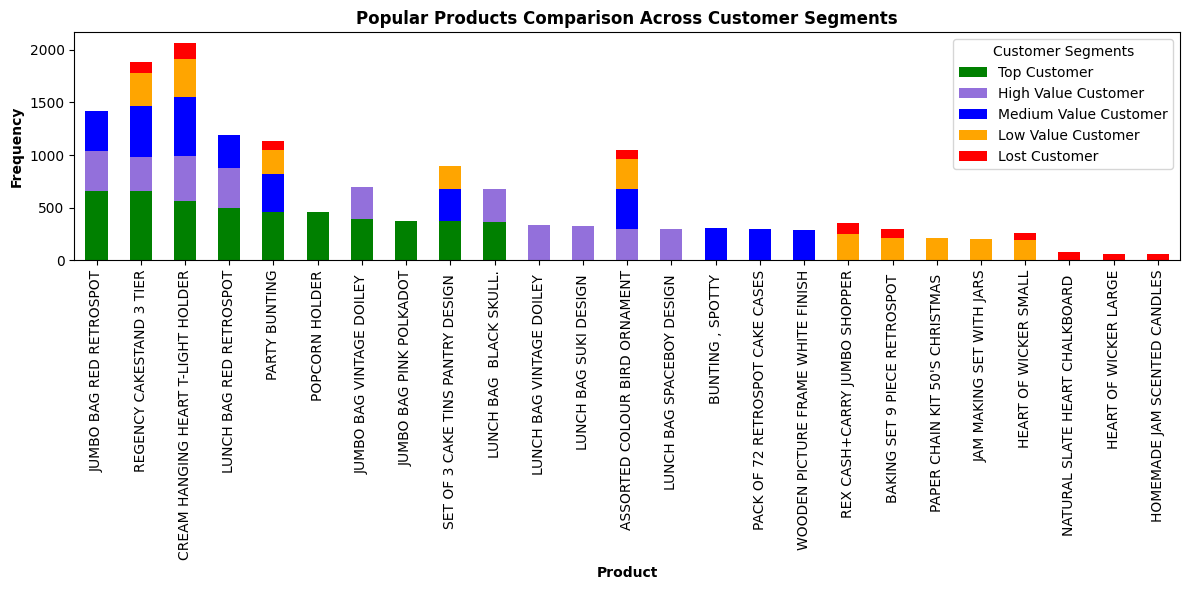

In [6]:
# Remove "Unknown" description from the dataset, because it doesn't bring much value
customer_set_wo_unknown = customer_set_w_segments[customer_set_w_segments['description']!='Unknown']

# Create a DataFrame for each customer segment
top_customer_df= customer_set_wo_unknown[customer_set_wo_unknown['customer_segmentation'] == 'top_customer']
high_value_customer_df = customer_set_wo_unknown[customer_set_wo_unknown['customer_segmentation'] == 'high_value_customer']
medium_value_customer_df = customer_set_wo_unknown[customer_set_wo_unknown['customer_segmentation'] == 'medium_value_customer']
low_value_customer_df = customer_set_wo_unknown[customer_set_wo_unknown['customer_segmentation'] == 'low_value_customer']
lost_customer_df = customer_set_wo_unknown[customer_set_wo_unknown['customer_segmentation'] == 'lost_customer']

# Extract the top 10 products for each segment
top_customer_top_products = top_customer_df['description'].value_counts().nlargest(10)
high_value_customer_top_products = high_value_customer_df['description'].value_counts().nlargest(10)
medium_value_customer_top_products = medium_value_customer_df['description'].value_counts().nlargest(10)
low_value_customer_top_products = low_value_customer_df['description'].value_counts().nlargest(10)
lost_customer_top_products = lost_customer_df['description'].value_counts().nlargest(10)

# Combine the data for all segments
combined_data = pd.concat([top_customer_top_products, high_value_customer_top_products,
                           medium_value_customer_top_products, low_value_customer_top_products,
                           lost_customer_top_products], axis=1)

combined_data.columns = ['Top Customer', 'High Value Customer', 'Medium Value Customer',
                         'Low Value Customer', 'Lost Customer']

# Plot a stacked bar chart to visualize the top products in each segment
combined_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'mediumpurple', 'blue','orange', 'red'])
plt.xlabel('Product', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Popular Products Comparison Across Customer Segments', fontweight='bold')
plt.legend(title='Customer Segments')
plt.tight_layout()
plt.show()


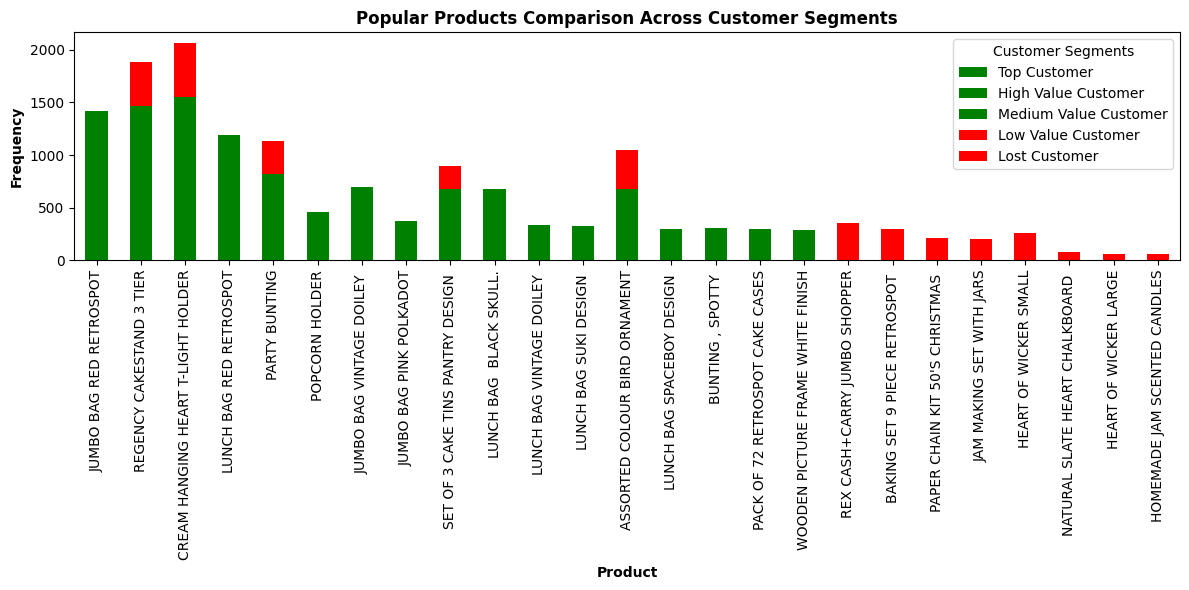

In [7]:
# Plot a stacked bar chart to visualize the top products in each segment
combined_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'green', 'green','red', 'red'])
plt.xlabel('Product', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Popular Products Comparison Across Customer Segments', fontweight='bold')
plt.legend(title='Customer Segments')
plt.tight_layout()
plt.show()

Low-Value and Lost Customers together represent 63% of the total customer base, while Top, High, and Medium Value Customers make up the remaining 37%. When I examine the Top 10 products preferred by each customer category, I find that **only 5 products overlap across all 25** of these top product lists.

**This observation suggests several potential implications:**

- **Product Variety:** The overlap in preferred products could indicate that certain products have broad appeal across customer segments, possibly due to their versatility or widespread popularity.

- **Segment-Specific Preferences:** The fact that the majority of top products are unique to each segment (i.e., not shared among all segments) implies that different customer groups have distinct preferences. Tailoring marketing and product recommendations to these preferences may enhance customer engagement and retention.

- **Untapped Opportunities:** Identifying products that are popular among specific segments but not widely adopted across all segments could present opportunities for targeted marketing campaigns. For example, promoting segment-specific products to the corresponding customer group may yield better results.

- **Customer Retention:** Since Low-Value and Lost Customers make up the majority, understanding their preferences and finding ways to incentivize them with products they might be interested in could be a key strategy for customer retention and reactivation.

- **Diverse Product Portfolio:** Maintaining a diverse product portfolio that appeals to a wide range of customer preferences is essential. This diversity can help attract and retain customers across various segments.

In conclusion, the variation in top product preferences among customer segments highlights the importance of personalized marketing strategies and product recommendations to cater to the diverse needs and interests of different customer groups. 

In [8]:
# replace Nan values with 0

combined_data_wo_na = combined_data.fillna(0)

In [9]:
combined_data_wo_na

,Top Customer,High Value Customer,Medium Value Customer,Low Value Customer,Lost Customer
description,,,,,
JUMBO BAG RED RETROSPOT,659.0,383.0,381.0,0.0,0.0
REGENCY CAKESTAND 3 TIER,658.0,322.0,485.0,315.0,109.0
CREAM HANGING HEART T-LIGHT HOLDER,566.0,424.0,564.0,361.0,149.0
LUNCH BAG RED RETROSPOT,499.0,375.0,317.0,0.0,0.0
PARTY BUNTING,458.0,0.0,358.0,232.0,89.0
POPCORN HOLDER,456.0,0.0,0.0,0.0,0.0
JUMBO BAG VINTAGE DOILEY,391.0,308.0,0.0,0.0,0.0
JUMBO BAG PINK POLKADOT,371.0,0.0,0.0,0.0,0.0
SET OF 3 CAKE TINS PANTRY DESIGN,369.0,0.0,311.0,218.0,0.0


### Comparing Top 10 Products in Top Customer and Lost Customer Segments

In [10]:
# Combine the data for Top and Lost Customer segments

data_top_lost = combined_data_wo_na[['Top Customer', 'Lost Customer']]
data_top_lost = data_top_lost[(data_top_lost['Top Customer'] > 0)|(data_top_lost['Lost Customer'] > 0)]

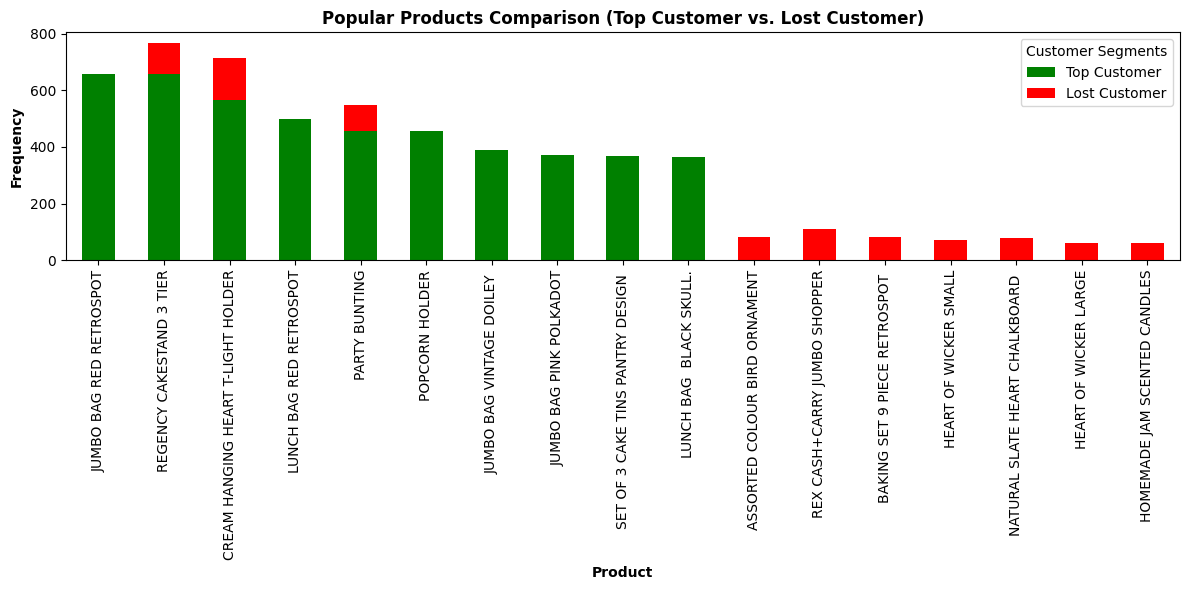

In [11]:
# Plot a stacked bar chart to visualize the top products in each segment
data_top_lost.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red'])
plt.xlabel('Product', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Popular Products Comparison (Top Customer vs. Lost Customer)', fontweight='bold')
plt.legend(title='Customer Segments')
plt.tight_layout()
plt.show()

When we analyze the top 10 products in the "Top Customer" and "Lost Customer" segments, we observe that only 3 products are common between them. This suggests that customer attrition might be influenced by the specific products they purchase. However, conducting further investigation is challenging due to the absence of product categorization.

### Comparing Top 10 Products in Top and High Value Customer

In [12]:
# Combine the data for Top and High Value Customer segments

data_top_high_lost = combined_data_wo_na[['Top Customer', 'High Value Customer']]
data_top_high_lost = data_top_high_lost[(data_top_high_lost['Top Customer'] > 0)|(data_top_high_lost['High Value Customer'] > 0)]

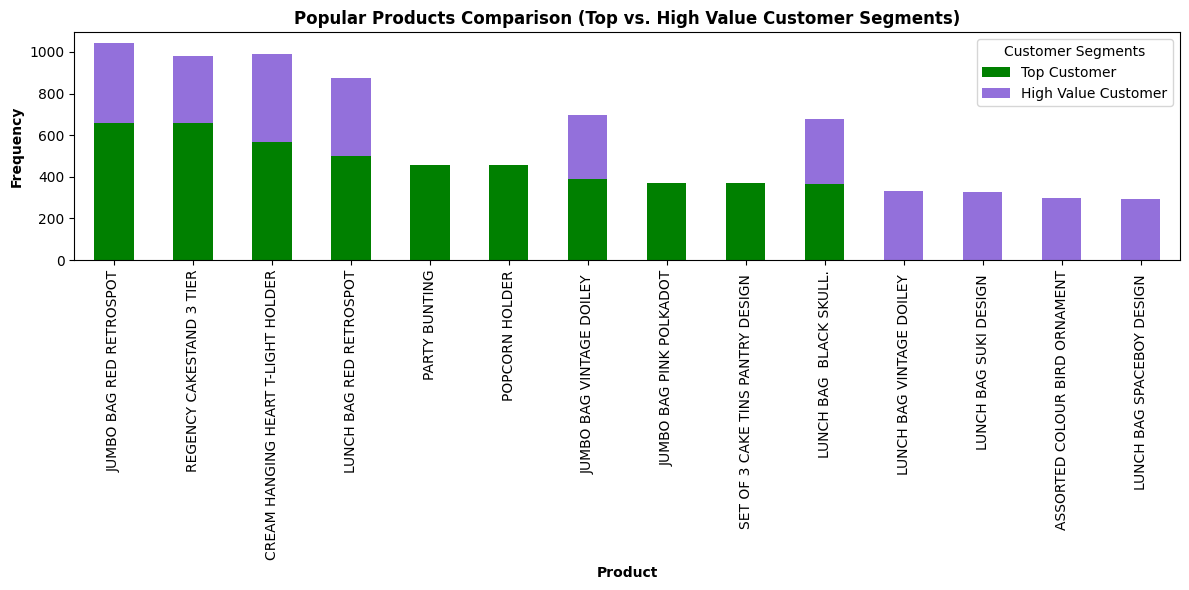

In [13]:
# Plot a stacked bar chart to visualize the top products in each segment
data_top_high_lost.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'mediumpurple'])
plt.xlabel('Product', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Popular Products Comparison (Top vs. High Value Customer Segments)', fontweight='bold')
plt.legend(title='Customer Segments')
plt.tight_layout()
plt.show()

### Comparing Top 10 Products in Low Value and Lost Customer Segments

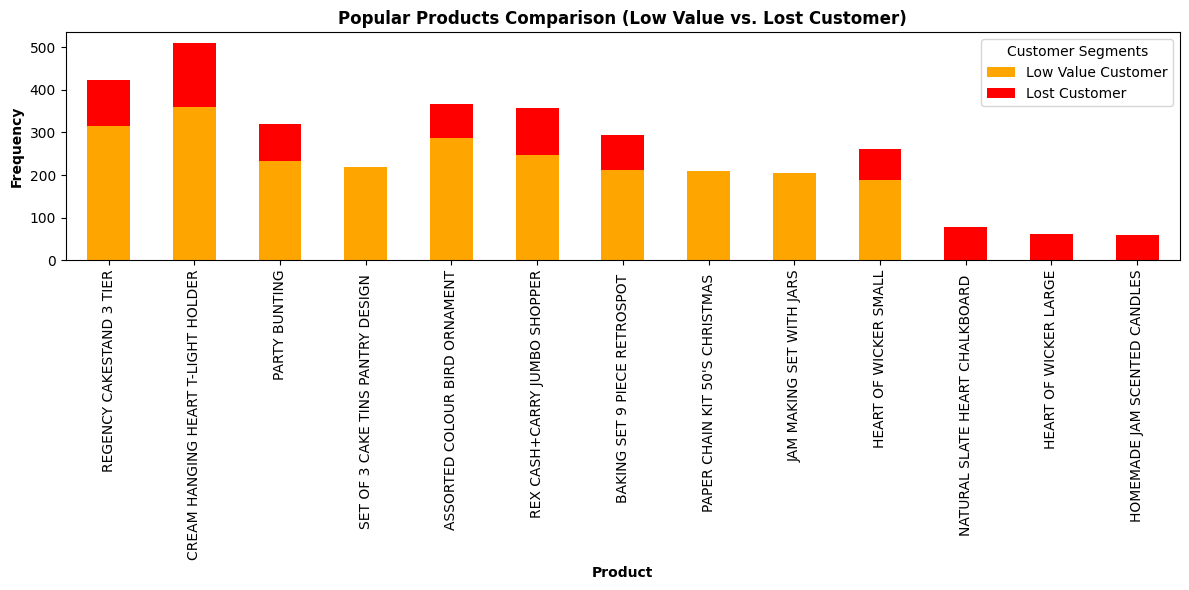

In [14]:
# Combine the data for Low Value and Lost Customer segments

data_low_lost = combined_data_wo_na[['Low Value Customer', 'Lost Customer']]
data_low_lost = data_low_lost[(data_low_lost['Low Value Customer'] > 0)|(data_low_lost['Lost Customer'] > 0)]
, '
# Plot a stacked bar chart to visualize the top products in each segment
data_low_lost.plot(kind='bar', stacked=True, figsize=(12, 6), color=['orange', 'red'])
plt.xlabel('Product', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Popular Products Comparison (Low Value vs. Lost Customer)', fontweight='bold')
plt.legend(title='Customer Segments')
plt.tight_layout()
plt.show()


### Comparing Top 10 Products in Medium Value and High Value Customer Segments

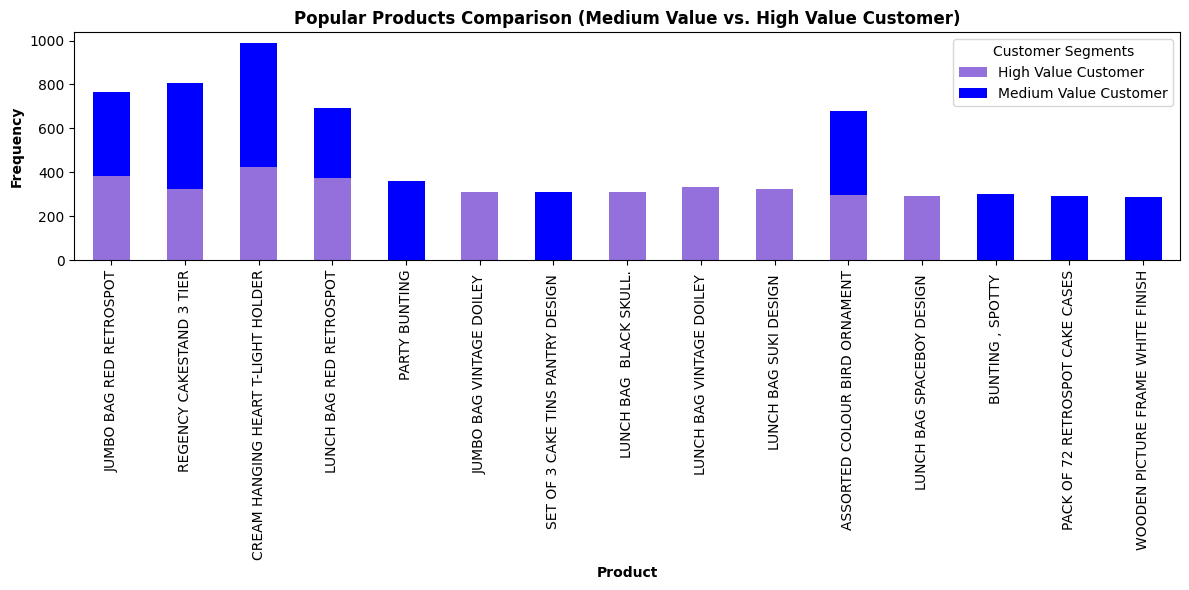

In [15]:
# Combine the data for Medium Value and High Value Customer Segments

data_medium_high = combined_data_wo_na[['High Value Customer', 'Medium Value Customer']]
data_medium_high = data_medium_high[(data_medium_high['High Value Customer'] > 0)|(data_medium_high['Medium Value Customer'] > 0)]
, '
# Plot a stacked bar chart to visualize the top products in each segment
data_medium_high.plot(kind='bar', stacked=True, figsize=(12, 6), color=['mediumpurple', 'blue'])
plt.xlabel('Product', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Popular Products Comparison (Medium Value vs. High Value Customer)', fontweight='bold')
plt.legend(title='Customer Segments')
plt.tight_layout()
plt.show()


### Based on the top ten most popular products in different customer segments, we can draw several conclusions:

- JUMBO BAG RED RETROSPOT and REGENCY CAKESTAND 3 TIER are popular across all segments, particularly among Top Customers. These products might have universal appeal and should be highlighted in marketing efforts.

- CREAM HANGING HEART T-LIGHT HOLDER also enjoys popularity across segments but is especially favored by High Value Customers. It's crucial to ensure these customers are aware of such products and incentivized to continue their loyalty.

- LUNCH BAG RED RETROSPOT is preferred by both Top Customers and High Value Customers, indicating that these customer groups may have similar preferences for this product category.

- PARTY BUNTING is more popular among Medium Value Customers and Low Value Customers, suggesting that it might be a good product to target these segments.

- POPCORN HOLDER appears to have limited popularity and may not be a strong driver of sales in any segment.

- JUMBO BAG VINTAGE DOILEY is favored by Top Customers and High Value Customers but not as much among other segments.

- SET OF 3 CAKE TINS PANTRY DESIGN appeals to both Top Customers and Medium Value Customers, indicating its versatility in attracting different segments.

- LUNCH BAG BLACK SKULL is popular among Top Customers and High Value Customers, suggesting it may have a niche but engaged customer base.

- ASSORTED COLOUR BIRD ORNAMENT is appreciated by High Value Customers and Medium Value Customers, indicating its potential for cross-segment marketing.

- REX CASH+CARRY JUMBO SHOPPER and BAKING SET 9 PIECE RETROSPOT seem to be more attractive to Low Value Customers and Lost Customers, highlighting an opportunity to engage and upsell these segments.

## Distribution of Orders per Month, Day of the Week and Hour

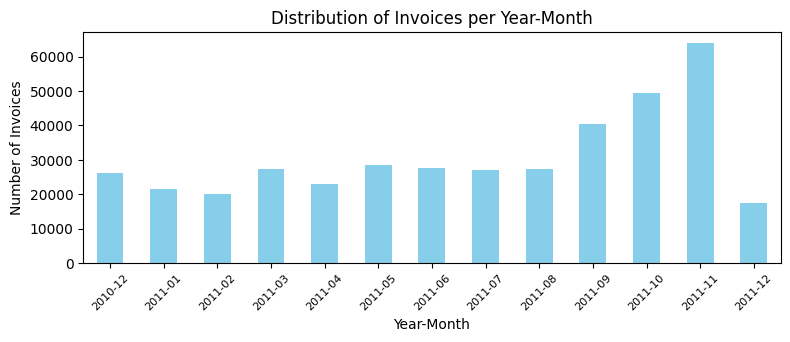

In [16]:
# Extract year and month from 'invoice_date'
customer_set_w_segments['invoice_year'] = customer_set_w_segments['invoice_date'].dt.year
customer_set_w_segments['invoice_month'] = customer_set_w_segments['invoice_date'].dt.month

# Define a list of month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Plot the distribution of invoices per month and year
plt.figure(figsize=(9, 3))
customer_set_w_segments['invoice_year_month'] = customer_set_w_segments['invoice_date'].dt.strftime('%Y-%m')
ax = customer_set_w_segments['invoice_year_month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Number of Invoices')
plt.title('Distribution of Invoices per Year-Month')
plt.xticks(rotation=45, fontsize=8)  
plt.show()

The distribution of invoices per year-month reveals an interesting trend: sales appear to steadily increase starting from September and reach their peak in November. This pattern may indicate that the holiday shopping season, which typically includes events like Black Friday and Cyber Monday, has a significant impact on sales. Customers tend to make more purchases during this period, driving up revenue for businesses. 

In conclusion, businesses should capitalize on this surge in sales during the holiday season by implementing effective marketing and sales strategies to maximize their revenue potential. Additionally, understanding and catering to customer preferences during this time can lead to even greater success.

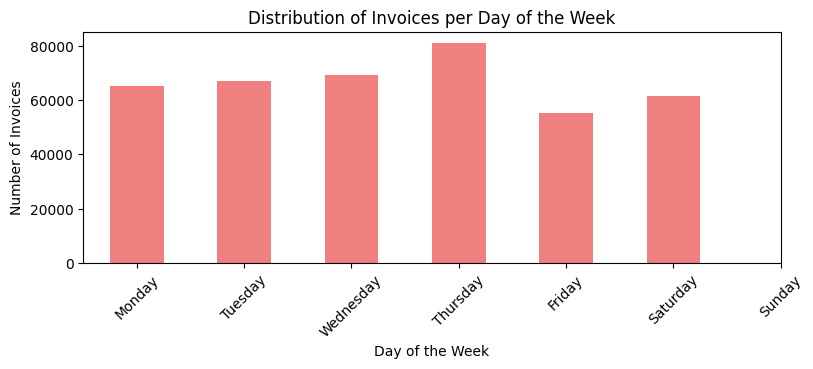

In [18]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
customer_set_w_segments['invoice_day_of_week'] = customer_set_w_segments['invoice_date'].dt.dayofweek

# Count the number of invoices for each day of the week and sort by day index
invoice_counts = customer_set_w_segments['invoice_day_of_week'].value_counts().sort_index()

# Create a bar chart with day names
plt.figure(figsize=(9, 3))
invoice_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Invoices')
plt.title('Distribution of Invoices per Day of the Week')
plt.xticks(range(7), day_names, rotation=45)
plt.show()

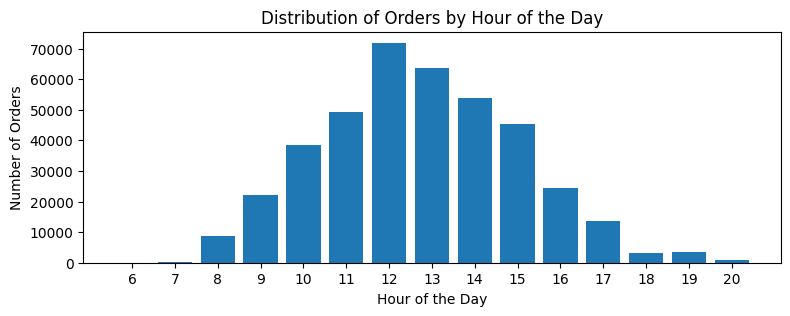

The hour with the highest number of orders is 12:00.


In [19]:
# Extract the hour from the 'invoice_date' and create a new column
customer_set_w_segments['order_hour'] = customer_set_w_segments['invoice_date'].dt.hour

# Group the data by hour and count the number of orders in each hour
hourly_order_counts = customer_set_w_segments['order_hour'].value_counts().sort_index()

# Plot the distribution of orders by hour
plt.figure(figsize=(9, 3))
plt.bar(hourly_order_counts.index, hourly_order_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour of the Day')
plt.xticks(hourly_order_counts.index)
plt.show()

# Find the hour with the highest number of orders
highest_hour = hourly_order_counts.idxmax()
print(f"The hour with the highest number of orders is {highest_hour}:00.")

**Distribution of Invoices per Day of the Week:** The bar chart displays the distribution of invoices across the days of the week. Thursday has the highest number of invoices, indicating that it's a day when customers tend to make more purchases.

**Distribution of Orders by Hour of the Day:** This chart illustrates the hourly distribution of orders. It shows that 12:00 PM (noon) is the hour with the highest number of orders, suggesting that many customers place orders around lunchtime.

### Based on the insights gained from the analysis, here are some suggestions for businesses:

- **Day of the Week Strategy:** Since Thursday appears to be the day with the highest number of invoices, consider running special promotions or marketing campaigns on Thursdays to further boost sales. Additionally, analyze why Thursdays are popular and see if similar strategies can be applied to other days.

- **Optimize Lunchtime Orders:** With the peak in orders occurring around 12:00 PM, it's essential to ensure efficient order processing during this time. Allocate more staff or resources to handle the increased demand to provide a seamless customer experience.

- **Customer Engagement:** Use the knowledge of peak order times to engage with customers effectively. Send order confirmations, updates, or promotions during these hours to maximize customer engagement and satisfaction.

- **Product Availability:** Ensure that popular products are adequately stocked during peak hours to prevent stockouts and missed sales opportunities.

- **Explore Product Categories:** Segmenting products into categories can facilitate the exploration of which product types are in high demand during various times of the day or specific days of the week. This segmentation can be valuable for customizing product recommendations and optimizing marketing strategies accordingly. So consider enriching the dataset with product category information.